In [ ]:
import cv2
import dlib
import time
import numpy as np


In [ ]:

filepath = "/Users/yuhua.cheng/PycharmProjects/FaceDetector/data/"

img = cv2.imread(filepath + "face.png")
height, width, channels = img.shape
rescale = 0.5
grayImg = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)

# get face detectors
faceDetector = dlib.get_frontal_face_detector()
# get landmark detectors
landmarkPredictor = dlib.shape_predictor(filepath + "shape_predictor_68_face_landmarks.dat")

faces = faceDetector(grayImg, 1)
time_start = time.time()
for face in faces:
    landmarks = landmarkPredictor(img, face)  # get 68 landmarks for each face
    print(len(landmarks.parts()))
    # 遍历所有点，打印出其坐标，并圈出来
    for pt in landmarks.parts():
        pt_pos = (pt.x, pt.y)
        cv2.circle(img, pt_pos, 2, (0, 255, 0), 1)

Faces found:  1
242 111 490 359


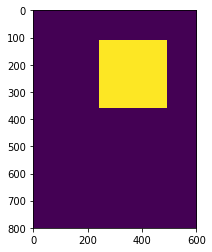

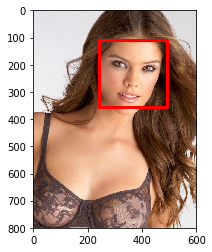

In [25]:

# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')



#  Loading the image to be tested
test_image = cv2.imread('my_girl.png')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')


# Since we know that OpenCV loads an image in BGR format so we need to convert it into RBG format to be able to display its true colours. Let us write a small function for that.



def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# # Haar cascade files

# Loading the classifier for frontal face


haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')


haar_cascade_face.detectMultiScale(test_image_gray)
# # Face detection


faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))



# Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a green rectangle with thicknessof 2


trimap = np.zeros_like(test_image_gray) + 0.5

for (x,y,w,h) in faces_rects:
     print(x, y, x+w, h+y)
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 10)
     trimap[y:h+y, x:x+w] = 1

plt.imshow(trimap)
plt.show()
cv2.imwrite('my_girl_haartrimap.png', trimap * 255)


# Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.


#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))
plt.show()


#  Let us create a generalised function for the entire face detection process.

cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

def detect_faces(test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors = 5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy


# # Testing the function on new image


# #loading image
# test_image2 = cv2.imread('group.jpg')

# #call the function to detect faces
# faces = detect_faces(haar_cascade_face, test_image2)

# #convert to RGB and display image
# plt.imshow(convertToRGB(faces))

# # Saving the final image

# cv2.imwrite('image1.png',faces)

In [31]:
import numpy as np
import os
import cv2 
import matplotlib.pyplot as plt


cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

def detect_faces(test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors = 5)
    trimap = np.zeros_like(gray_image) + 0.5
    for (x, y, w, h) in faces_rect:
        # cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 10)
        trimap[y:y+h, x:x+w] = 1
        
    return trimap


old_dir = '/home/charlesxujl/segmentation/results/inf/raw/'
new_dir = '/home/charlesxujl/segmentation/results/inf/haar_trimaps/'

imgs = sorted(os.listdir(old_dir))

for f in imgs:
    img = cv2.imread(os.path.join(old_dir, f))
    trimap = detect_faces(img)
    cv2.imwrite(os.path.join(new_dir, f), trimap*255)
    print(f)



1803151818-00000003_raw.png
1803151818-00000004_raw.png
1803151818-00000006_raw.png
1803151818-00000007_raw.png
1803151818-00000008_raw.png
1803151818-00000009_raw.png
1803151818-00000010_raw.png
1803151818-00000012_raw.png
1803151818-00000015_raw.png
1803151818-00000017_raw.png
1803151818-00000020_raw.png
1803151818-00000021_raw.png
1803151818-00000022_raw.png
1803151818-00000023_raw.png
1803151818-00000024_raw.png
1803151818-00000025_raw.png
1803151818-00000026_raw.png
1803151818-00000030_raw.png
1803151818-00000041_raw.png
1803151818-00000042_raw.png
1803151818-00000043_raw.png
1803151818-00000045_raw.png
1803151818-00000046_raw.png
1803151818-00000047_raw.png
1803151818-00000048_raw.png
1803151818-00000051_raw.png
1803151818-00000052_raw.png
1803151818-00000053_raw.png
1803151818-00000054_raw.png
1803151818-00000060_raw.png
1803151818-00000061_raw.png
1803151818-00000062_raw.png
1803151818-00000065_raw.png
1803151818-00000066_raw.png
1803151818-00000069_raw.png
1803151818-00000074_

1803151818-00000644_raw.png
1803151818-00000647_raw.png
1803151818-00000653_raw.png
1803151818-00000655_raw.png
1803151818-00000659_raw.png
1803151818-00000663_raw.png
1803151818-00000665_raw.png
1803151818-00000666_raw.png
1803151818-00000670_raw.png
1803151818-00000672_raw.png
1803151818-00000674_raw.png
1803151818-00000679_raw.png
1803151818-00000681_raw.png
1803151818-00000683_raw.png
1803151818-00000684_raw.png
1803151818-00000685_raw.png
1803151818-00000686_raw.png
1803151818-00000687_raw.png
1803151818-00000688_raw.png
1803151818-00000692_raw.png
1803151818-00000693_raw.png
1803151818-00000696_raw.png
1803151818-00000697_raw.png
1803151818-00000699_raw.png
1803151818-00000701_raw.png
1803151818-00000702_raw.png
1803151818-00000704_raw.png
1803151818-00000705_raw.png
1803151818-00000706_raw.png
1803151818-00000709_raw.png
1803151818-00000710_raw.png
1803151818-00000714_raw.png
1803151818-00000715_raw.png
1803151818-00000721_raw.png
1803151818-00000724_raw.png
1803151818-00000727_

1803151818-00001265_raw.png
1803151818-00001267_raw.png
1803151818-00001268_raw.png
1803151818-00001269_raw.png
1803151818-00001270_raw.png
1803151818-00001275_raw.png
1803151818-00001276_raw.png
1803151818-00001282_raw.png
1803151818-00001283_raw.png
1803151818-00001285_raw.png
1803151818-00001287_raw.png
1803151818-00001289_raw.png
1803151818-00001291_raw.png
1803151818-00001296_raw.png
1803151818-00001297_raw.png
1803151818-00001300_raw.png
1803151818-00001304_raw.png
1803151818-00001305_raw.png
1803151818-00001307_raw.png
1803151818-00001309_raw.png
1803151818-00001313_raw.png
1803151818-00001314_raw.png
1803151818-00001315_raw.png
1803151818-00001316_raw.png
1803151818-00001318_raw.png
1803151818-00001321_raw.png
1803151818-00001327_raw.png
1803151818-00001329_raw.png
1803151818-00001330_raw.png
1803151818-00001331_raw.png
1803151818-00001332_raw.png
1803151818-00001333_raw.png
1803151818-00001339_raw.png
1803151818-00001341_raw.png
1803151818-00001343_raw.png
1803151818-00001345_

1803151818-00001898_raw.png
1803151818-00001903_raw.png
1803151818-00001906_raw.png
1803151818-00001909_raw.png
1803151818-00001910_raw.png
1803151818-00001920_raw.png
1803151818-00001923_raw.png
1803151818-00001926_raw.png
1803151818-00001927_raw.png
1803151818-00001930_raw.png
1803151818-00001932_raw.png
1803151818-00001937_raw.png
1803151818-00001938_raw.png
1803151818-00001941_raw.png
1803151818-00001942_raw.png
1803151818-00001943_raw.png
1803151818-00001948_raw.png
1803151818-00001949_raw.png
1803151818-00001950_raw.png
1803151818-00001953_raw.png
1803151818-00001961_raw.png
1803151818-00001962_raw.png
1803151818-00001965_raw.png
1803151818-00001967_raw.png
1803151818-00001970_raw.png
1803151818-00001971_raw.png
1803151818-00001973_raw.png
1803151818-00001977_raw.png
1803151818-00001978_raw.png
1803151818-00001979_raw.png
1803151818-00001981_raw.png
1803151818-00001988_raw.png
1803151818-00001989_raw.png
1803151818-00001992_raw.png
1803151818-00001995_raw.png
1803151818-00002002_

1803151818-00002575_raw.png
1803151818-00002576_raw.png
1803151818-00002579_raw.png
1803151818-00002582_raw.png
1803151818-00002585_raw.png
1803151818-00002588_raw.png
1803151818-00002590_raw.png
1803151818-00002594_raw.png
1803151818-00002595_raw.png
1803151818-00002601_raw.png
1803151818-00002602_raw.png
1803151818-00002604_raw.png
1803151818-00002605_raw.png
1803151818-00002607_raw.png
1803151818-00002608_raw.png
1803151818-00002610_raw.png
1803151818-00002615_raw.png
1803151818-00002616_raw.png
1803151818-00002624_raw.png
1803151818-00002625_raw.png
1803151818-00002627_raw.png
1803151818-00002628_raw.png
1803151818-00002630_raw.png
1803151818-00002631_raw.png
1803151818-00002632_raw.png
1803151818-00002636_raw.png
1803151818-00002637_raw.png
1803151818-00002638_raw.png
1803151818-00002639_raw.png
1803151818-00002641_raw.png
1803151818-00002642_raw.png
1803151818-00002643_raw.png
1803151818-00002646_raw.png
1803151818-00002647_raw.png
1803151818-00002649_raw.png
1803151818-00002650_

1803151818-00003236_raw.png
1803151818-00003237_raw.png
1803151818-00003239_raw.png
1803151818-00003241_raw.png
1803151818-00003243_raw.png
1803151818-00003244_raw.png
1803151818-00003246_raw.png
1803151818-00003248_raw.png
1803151818-00003249_raw.png
1803151818-00003251_raw.png
1803151818-00003256_raw.png
1803151818-00003260_raw.png
1803151818-00003263_raw.png
1803151818-00003264_raw.png
1803151818-00003265_raw.png
1803151818-00003266_raw.png
1803151818-00003267_raw.png
1803151818-00003271_raw.png
1803151818-00003272_raw.png
1803151818-00003274_raw.png
1803151818-00003275_raw.png
1803151818-00003276_raw.png
1803151818-00003277_raw.png
1803151818-00003279_raw.png
1803151818-00003282_raw.png
1803151818-00003283_raw.png
1803151818-00003285_raw.png
1803151818-00003286_raw.png
1803151818-00003290_raw.png
1803151818-00003295_raw.png
1803151818-00003299_raw.png
1803151818-00003304_raw.png
1803151818-00003311_raw.png
1803151818-00003312_raw.png
1803151818-00003314_raw.png
1803151818-00003319_

1803151818-00003919_raw.png
1803151818-00003920_raw.png
1803151818-00003922_raw.png
1803151818-00003923_raw.png
1803151818-00003924_raw.png
1803151818-00003926_raw.png
1803151818-00003927_raw.png
1803151818-00003930_raw.png
1803151818-00003936_raw.png
1803151818-00003938_raw.png
1803151818-00003941_raw.png
1803151818-00003944_raw.png
1803151818-00003946_raw.png
1803151818-00003947_raw.png
1803151818-00003948_raw.png
1803151818-00003949_raw.png
1803151818-00003951_raw.png
1803151818-00003953_raw.png
1803151818-00003954_raw.png
1803151818-00003959_raw.png
1803151818-00003963_raw.png
1803151818-00003964_raw.png
1803151818-00003965_raw.png
1803151818-00003966_raw.png
1803151818-00003968_raw.png
1803151818-00003970_raw.png
1803151818-00003976_raw.png
1803151818-00003977_raw.png
1803151818-00003979_raw.png
1803151818-00003982_raw.png
1803151818-00003983_raw.png
1803151818-00003989_raw.png
1803151818-00003990_raw.png
1803151818-00003992_raw.png
1803151818-00003996_raw.png
1803151818-00003999_

1803151818-00004611_raw.png
1803151818-00004613_raw.png
1803151818-00004615_raw.png
1803151818-00004616_raw.png
1803151818-00004619_raw.png
1803151818-00004621_raw.png
1803151818-00004622_raw.png
1803151818-00004624_raw.png
1803151818-00004626_raw.png
1803151818-00004627_raw.png
1803151818-00004629_raw.png
1803151818-00004632_raw.png
1803151818-00004633_raw.png
1803151818-00004634_raw.png
1803151818-00004639_raw.png
1803151818-00004640_raw.png
1803151818-00004642_raw.png
1803151818-00004644_raw.png
1803151818-00004647_raw.png
1803151818-00004648_raw.png
1803151818-00004649_raw.png
1803151818-00004651_raw.png
1803151818-00004653_raw.png
1803151818-00004658_raw.png
1803151818-00004661_raw.png
1803151818-00004662_raw.png
1803151818-00004663_raw.png
1803151818-00004666_raw.png
1803151818-00004669_raw.png
1803151818-00004673_raw.png
1803151818-00004674_raw.png
1803151818-00004677_raw.png
1803151818-00004679_raw.png
1803151818-00004681_raw.png
1803151818-00004682_raw.png
1803151818-00004685_

1803151818-00005283_raw.png
1803151818-00005284_raw.png
1803151818-00005285_raw.png
1803151818-00005287_raw.png
1803151818-00005290_raw.png
1803151818-00005297_raw.png
1803151818-00005300_raw.png
1803151818-00005301_raw.png
1803151818-00005305_raw.png
1803151818-00005306_raw.png
1803151818-00005312_raw.png
1803151818-00005313_raw.png
1803151818-00005315_raw.png
1803151818-00005322_raw.png
1803151818-00005323_raw.png
1803151818-00005326_raw.png
1803151818-00005327_raw.png
1803151818-00005328_raw.png
1803151818-00005329_raw.png
1803151818-00005331_raw.png
1803151818-00005332_raw.png
1803151818-00005333_raw.png
1803151818-00005335_raw.png
1803151818-00005336_raw.png
1803151818-00005339_raw.png
1803151818-00005341_raw.png
1803151818-00005342_raw.png
1803151818-00005344_raw.png
1803151818-00005346_raw.png
1803151818-00005347_raw.png
1803151818-00005348_raw.png
1803151818-00005352_raw.png
1803151818-00005354_raw.png
1803151818-00005355_raw.png
1803151818-00005356_raw.png
1803151818-00005362_

1803151818-00005935_raw.png
1803151818-00005937_raw.png
1803151818-00005938_raw.png
1803151818-00005943_raw.png
1803151818-00005945_raw.png
1803151818-00005948_raw.png
1803151818-00005950_raw.png
1803151818-00005952_raw.png
1803151818-00005956_raw.png
1803151818-00005957_raw.png
1803151818-00005960_raw.png
1803151818-00005962_raw.png
1803151818-00005966_raw.png
1803151818-00005967_raw.png
1803151818-00005968_raw.png
1803151818-00005969_raw.png
1803151818-00005970_raw.png
1803151818-00005971_raw.png
1803151818-00005976_raw.png
1803151818-00005982_raw.png
1803151818-00005988_raw.png
1803151818-00005989_raw.png
1803151818-00005990_raw.png
1803151818-00005993_raw.png
1803151818-00005995_raw.png
1803151818-00005996_raw.png
1803151818-00006000_raw.png
1803151818-00006001_raw.png
1803151818-00006002_raw.png
1803151818-00006003_raw.png
1803151818-00006007_raw.png
1803151818-00006008_raw.png
1803151818-00006010_raw.png
1803151818-00006013_raw.png
1803151818-00006014_raw.png
1803151818-00006016_

1803151818-00006660_raw.png
1803151818-00006664_raw.png
1803151818-00006665_raw.png
1803151818-00006670_raw.png
1803151818-00006671_raw.png
1803151818-00006674_raw.png
1803151818-00006675_raw.png
1803151818-00006676_raw.png
1803151818-00006679_raw.png
1803151818-00006681_raw.png
1803151818-00006684_raw.png
1803151818-00006687_raw.png
1803151818-00006688_raw.png
1803151818-00006689_raw.png
1803151818-00006692_raw.png
1803151818-00006693_raw.png
1803151818-00006695_raw.png
1803151818-00006699_raw.png
1803151818-00006702_raw.png
1803151818-00006703_raw.png
1803151818-00006706_raw.png
1803151818-00006707_raw.png
1803151818-00006708_raw.png
1803151818-00006709_raw.png
1803151818-00006711_raw.png
1803151818-00006712_raw.png
1803151818-00006715_raw.png
1803151818-00006716_raw.png
1803151818-00006717_raw.png
1803151818-00006719_raw.png
1803151818-00006721_raw.png
1803151818-00006722_raw.png
1803151818-00006726_raw.png
1803151818-00006732_raw.png
1803151818-00006737_raw.png
1803151818-00006739_

1803151818-00007326_raw.png
1803151818-00007332_raw.png
1803151818-00007335_raw.png
1803151818-00007337_raw.png
1803151818-00007341_raw.png
1803151818-00007345_raw.png
1803151818-00007346_raw.png
1803151818-00007348_raw.png
1803151818-00007349_raw.png
1803151818-00007350_raw.png
1803151818-00007355_raw.png
1803151818-00007356_raw.png
1803151818-00007360_raw.png
1803151818-00007361_raw.png
1803151818-00007365_raw.png
1803151818-00007372_raw.png
1803151818-00007376_raw.png
1803151818-00007377_raw.png
1803151818-00007385_raw.png
1803151818-00007387_raw.png
1803151818-00007389_raw.png
1803151818-00007392_raw.png
1803151818-00007396_raw.png
1803151818-00007398_raw.png
1803151818-00007399_raw.png
1803151818-00007400_raw.png
1803151818-00007409_raw.png
1803151818-00007410_raw.png
1803151818-00007411_raw.png
1803151818-00007412_raw.png
1803151818-00007417_raw.png
1803151818-00007421_raw.png
1803151818-00007423_raw.png
1803151818-00007433_raw.png
1803151818-00007436_raw.png
1803151818-00007437_